<a href="https://colab.research.google.com/github/ric-clemente/Crypto_Sentiment_vs_Price/blob/master/Crypto_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Packages**

In [1]:
!pip install --user -U nltk
!pip install twitterscraper==1.1

import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')



     |████████████████████████████████| 1.5MB 4.9MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449907 sha256=7b56ee2f445cf90e55843974222d1151dbb39ec8daf1746dff48f13656f93b92
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk
     |████████████████████████████████| 92kB 10.7MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.1.0-cp36-none-any.whl size=9915 sha256=b719dc5b729443cc0684831763813edadc5bae6fd66fdd742f3e0578bbbac158
  Stored in directory: /root/.cache/pip/wheels/69/fe/f1/b3eb104388ec7e18e5c6f11afc9251ec483949d38b4ff453b3
Successfully built twitterscraper
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping 

True

**Twitter Scraping**

Date Range: 2017-11-5 and 2018-2-28

Max: 40000 Tweets

Keywords: BTC or Bitcoin

In [2]:

from twitterscraper import query_tweets
import datetime as dt
import pandas as pd

begin_date=dt.date(2017,11,5)
end_date=dt.date(2018,2,28)

limit = 40000
lang = 'english'

tweets= query_tweets("btc or bitcoin",begindate=begin_date,enddate=end_date,limit=limit,lang=lang)

#fill dataframe with one row per object, one attribute per column
df=pd.DataFrame([t.__dict__ for t in tweets])




INFO: queries: ['btc or bitcoin since:2017-11-05 until:2017-11-10', 'btc or bitcoin since:2017-11-10 until:2017-11-16', 'btc or bitcoin since:2017-11-16 until:2017-11-22', 'btc or bitcoin since:2017-11-22 until:2017-11-28', 'btc or bitcoin since:2017-11-28 until:2017-12-03', 'btc or bitcoin since:2017-12-03 until:2017-12-09', 'btc or bitcoin since:2017-12-09 until:2017-12-15', 'btc or bitcoin since:2017-12-15 until:2017-12-21', 'btc or bitcoin since:2017-12-21 until:2017-12-26', 'btc or bitcoin since:2017-12-26 until:2018-01-01', 'btc or bitcoin since:2018-01-01 until:2018-01-07', 'btc or bitcoin since:2018-01-07 until:2018-01-13', 'btc or bitcoin since:2018-01-13 until:2018-01-18', 'btc or bitcoin since:2018-01-18 until:2018-01-24', 'btc or bitcoin since:2018-01-24 until:2018-01-30', 'btc or bitcoin since:2018-01-30 until:2018-02-05', 'btc or bitcoin since:2018-02-05 until:2018-02-10', 'btc or bitcoin since:2018-02-10 until:2018-02-16', 'btc or bitcoin since:2018-02-16 until:2018-02-2

**Showing some scrape tweets**

In [3]:
df.head(5)


,fullname,html,id,likes,replies,retweets,text,timestamp,url,user
0,Jorge Palacios,"<p class=""TweetTextSize js-tweet-text tweet-te...",928772129977438208,0,0,0,Please share a bit or an entire @bitcoin 1EAp...,2017-11-09 23:51:46,/tlinxa/status/928772129977438208,tlinxa
1,LESTER LONG,"<p class=""TweetTextSize js-tweet-text tweet-te...",928770391924916224,1,1,0,Guess we should have let the corporate dbags c...,2017-11-09 23:44:51,/cadillackiller/status/928770391924916224,cadillackiller
2,Bitcoin España,"<p class=""TweetTextSize js-tweet-text tweet-te...",928768454508806144,0,0,0,do you guys think this would make /r/investing...,2017-11-09 23:37:09,/Bitcoin_Spain/status/928768454508806144,Bitcoin_Spain
3,Victor Golovtchenko,"<p class=""TweetTextSize js-tweet-text tweet-te...",928764831829843969,0,0,0,"OK, so something weird has been going on latel...",2017-11-09 23:22:46,/GolovtchenkoV/status/928764831829843969,GolovtchenkoV
4,BigBlockers,"<p class=""TweetTextSize js-tweet-text tweet-te...",928762883374071808,1,0,0,The current price of Bitcoin is $7131.75.\nThe...,2017-11-09 23:15:01,/big_blockers/status/928762883374071808,big_blockers


**Pre Processing Functions**

In [0]:






import re
import string

#First clean text and then remove stopwords and use steeming and lemmazation alghorithms


def pre_proc_text(message_list):
  
  from nltk.tokenize import word_tokenize
  from nltk.corpus import stopwords
  from nltk.stem import PorterStemmer
  from nltk.stem import WordNetLemmatizer

  

  


  stop_words = set(stopwords.words('english'))
  result=['']*len(message_list)


 


  for i in range(len(message_list)):
    

    tokens = word_tokenize(message_list[i])
    
    #remove stop words
    result[i]=[j for j in tokens if not j in stop_words]

    
    #use steeming
    stemmer= PorterStemmer()
    result[i]=[stemmer.stem(j) for j in result[i]] 
    
    #use lemmazation
    lemmatizer=WordNetLemmatizer()  
    result[i]=[lemmatizer.lemmatize(j) for j in result[i]] 

    
  return result  


def clean_msg(m_list):
  
  df_m_list = pd.DataFrame.from_dict({'text':m_list})
  
  #convert all text to lowercase
  df_m_list['text'] = [str(i).lower() for i in df_m_list['text']] 
  #remove pontuation
  df_m_list['text'] = df_m_list['text'].str.replace('[^\w\s]','')
  #remove white spaces
  df_m_list['text'] = df_m_list['text'].str.strip()
  #remove urls
  df_m_list['text'] = df_m_list['text'].str.replace('http\S+|www.\S+', '', case=False)
  #remove digits
  df_m_list['text'] = df_m_list['text'].str.replace('\d+', '', case=False)
  #remove hashtags
  df_m_list['text'] = df_m_list['text'].str.replace('#', '', case=False) 
  #remove reetweet tag
  df_m_list['text'] = df_m_list['text'].str.replace('^RT[\s]+', '', case=False)
  #remove week days
  df_m_list['text'] = df_m_list['text'].str.replace('mon|monday|tue|tuesday|wed|wednsday|thur|thursday|fri|friday|sat|saturday|sun|sunday', '', case=False)
  #remove month names
  df_m_list['text'] = df_m_list['text'].str.replace('jan|january|fev|february|mar|march|may|jun|june|jul|july|aug|august|sep|september|oct|october|nov|november|dec|december', '', case=False)
  #remove twitter usernames
  df_m_list['text'] = df_m_list['text'].str.replace('@[A-Za-z0-9]+','', case=False)
  
  clean_m_list=pre_proc_text(df_m_list['text'])
  return clean_m_list


**Function to extract sentences from datasets to an array**

In [0]:
from google.colab import files


def extract_sentences(file_name):
  try:
    file= open(file_name,"r",  encoding="ISO-8859-1")
  except:
    print(file_name)
    uploaded = files.upload()  
    file= open(file_name,"r",  encoding="ISO-8859-1")
  
  
  words=[]
  for line in file:

      
      if line[0]!=";" and line[0]!='\n':
        line=line.rstrip("\n")
        words.append(line)
        
  return words



**Load the positive and negative sentences from datasets**

In [7]:
positive_pol=[]
negative_pol=[]
positive_pol=extract_sentences('rt-polarity.pos')  
negative_pol=extract_sentences('rt-polarity.neg')  

print("positive words\n",positive_pol[:3])
print("negative words\n",negative_pol[:3])

rt-polarity.pos


Saving rt-polarity.pos to rt-polarity.pos
rt-polarity.neg


Saving rt-polarity.neg to rt-polarity.neg
positive words
 ['the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal . ', 'the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson\'s expanded vision of j . r . r . tolkien\'s middle-earth . ', 'effective but too-tepid biopic']
negative words
 ['simplistic , silly and tedious . ', "it's so laddish and juvenile , only teenage boys could possibly find it funny . ", 'exploitative and largely devoid of the depth or sophistication that would make watching such a graphic treatment of the crimes bearable . ']


**Clean the positive and negative sentences and give labels (1 for positive -1 for negative)**

In [8]:

X=[]  
y=[]  
clean_pol_pos=clean_msg(positive_pol)
for i in range(len(clean_pol_pos)):
  y.append(1)
  
clean_pol_neg=clean_msg(negative_pol)
for i in range(len(clean_pol_neg)):
  y.append(-1)
print(clean_pol_pos[0])
print(clean_pol_neg[0])




['rock', 'destin', 'st', 'centuri', 'new', 'conan', 'he', 'go', 'make', 'splash', 'even', 'greater', 'arnold', 'schwarzenegg', 'jeanclaud', 'van', 'damm', 'steven', 'segal']
['simplist', 'silli', 'tediou']


**Functions to Create a dictionary of words and convert text into vectors**

In [0]:
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVR
from sklearn.naive_bayes import GaussianNB
import random
import numpy as np


#dictionary with every word from datasets
def dic(list_words):
  vocab = []
  
  for i in range(len(list_words)):
      for w in list_words[i]:
        if w not in vocab:
          vocab.append(w)
  
  vocab = sorted(list(set(vocab)))
  return vocab

#count how many times each word occurs
def count_words(vocab,list_words):  
  bag_vector = [[0]*len(vocab)]*len(list_words)  
  
  for i in range(len(list_words)):   
      bag_vector[i]=np.zeros(len(vocab))
      
      for w in list_words[i]:
          for j in range(len(vocab)):
              if vocab[j] == w: 
                bag_vector[i][j] = bag_vector[i][j] + 1 
     
  return bag_vector                  
                  
      

  
  
  




**Train and Test the model to classify the positive and negative sentences**

In [10]:
dicionary_pol=dic(clean_pol_pos+ clean_pol_neg) 

X=count_words(dicionary_pol,clean_pol_pos+ clean_pol_neg)   
X=np.array(X)
y=np.array(y)
y=y.reshape(-1,1)
y=y.ravel()



nr_random=random.randint(2,50)
X_train_pol, X_test_pol, y_train_pol, y_test_pol = train_test_split(X, y, test_size=0.2,train_size=0.8,random_state=nr_random)

from sklearn.naive_bayes import MultinomialNB



model_pol = MultinomialNB()

clf=model_pol.fit(X_train_pol,y_train_pol)
score_train = model_pol.score(X_train_pol, y_train_pol)
score_test = model_pol.score(X_test_pol, y_test_pol)


print("Accuracy Train NB:", score_train)
print("Accuracy Test NB:", score_test)
score_total=clf.score(X_test_pol,y_test_pol)
print("total",score_total)

Accuracy Train NB: 0.9125337085238597
Accuracy Test NB: 0.7641819034224098
total 0.7641819034224098


**Load the subjective and objective sentences from datasets**

In [12]:
sub=[]
obj=[]
sub=extract_sentences('quote.tok.gt9.5000')  
obj=extract_sentences('plot.tok.gt9.5000')  

print("subjetive words\n",sub[:3])
print("objective words\n",obj[:3])





quote.tok.gt9.5000


Saving quote.tok.gt9.5000 to quote.tok.gt9.5000
plot.tok.gt9.5000


Saving plot.tok.gt9.5000 to plot.tok.gt9.5000
subjetive words
 ['smart and alert , thirteen conversations about one thing is a small gem . ', 'color , musical bounce and warm seas lapping on island shores . and just enough science to send you home thinking . ', 'it is not a mass-market entertainment but an uncompromising attempt by one artist to think about another . ']
objective words
 ['the movie begins in the past where a young boy named sam attempts to save celebi from a hunter . ', 'emerging from the human psyche and showing characteristics of abstract expressionism , minimalism and russian constructivism , graffiti removal has secured its place in the history of modern art while being created by artists who are unconscious of their artistic achievements . ', "spurning her mother's insistence that she get on with her life , mary is thrown out of the house , rejected by joe , and expelled from school as she grows larger with child . "]


**Clean the subjective and objective sentences and give labels (1 for subjective -1 for objective)**

In [13]:
X=[]  
y=[]  
clean_sub=clean_msg(sub)
for i in range(len(clean_sub)):
  y.append(1) #subjective
  
clean_obj=clean_msg(obj)
for i in range(len(clean_obj)):
  y.append(-1) #No subjective
print(clean_sub[3])
print(clean_obj[3])

['lightheart', 'french', 'film', 'spiritu', 'quest', 'fashion', 'model', 'seek', 'peac', 'mind', 'love', 'affair', 'veterinarian', 'nonpract', 'jew']
['amitabh', 'cant', 'believ', 'board', 'director', 'mind', 'fill', 'reveng', 'better', 'reveng', 'rob', 'bank', 'iron', 'sound']


**Train and Test the model to classify the subjective and objective sentences**

In [14]:
dicionary_sub=dic(clean_sub+ clean_obj)       
X=count_words(dicionary_sub,clean_sub+ clean_obj)   
X=np.array(X)
y=np.array(y)
y=y.reshape(-1,1)
y=y.ravel()



nr_random=random.randint(2,50)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,train_size=0.8,random_state=nr_random)


model_sub = MultinomialNB()
clf=model_sub.fit(X_train,y_train)
score_train = model_sub.score(X_train, y_train)
score_test = model_sub.score(X_test, y_test)


print("Accuracy Train NB:", score_train)
print("Accuracy Test NB:", score_test)
score_total=clf.score(X_test,y_test)
print("total",score_total)

Accuracy Train NB: 0.95525
Accuracy Test NB: 0.912
total 0.912


**Function to classify sentences**

In [0]:

def classify_msg(original_msg):
  msg=clean_msg([original_msg])


  msg_vector=count_words(dicionary_sub,msg)
  


  
  y_sub = model_sub.predict(msg_vector)
  
  
  if y_sub==1:
    msg_vector=count_words(dicionary_pol,msg)
    y_pol = model_pol.predict(msg_vector)
    if y_pol==1:
      return "Positive"
    else:
      return "Negative"
  else:
    return "Neutral"


**Change the format of dates and remove some columns from dataframe with the scrape tweets**

In [0]:
import datetime
df['dates'] = df['timestamp'].dt.date
df.drop(['fullname','html','replies','retweets','id','timestamp','url','user'],axis=1,inplace=True)

**Classify every tweets scraped and calculate the % of positive and negative tweets for each day**

Thresholds used:

-Tweets with at least 10 likes

In [26]:
positive=0
negative=0


day_pos=[]
day_neg=[]

day=[]
day_sample=[]
labels=[]

for i in range (len( df['dates'])):
  
  classification=classify_msg(df['text'][i])
  
  #save labels into list
  labels.append(classification)   
  
  if int(df['likes'][i])>=10:
    
    
    if classification=='Positive':
      positive=positive+1
    if classification=='Negative':
      negative=negative+1
      
  if i>0:

    if df['dates'][i]!=df['dates'][i-1]:  
      
      #save previous date into list
      day.append(str(df['dates'][i-1]))
      
      #save %pos and neg and nr of total tweets for each date
      if positive+negative>0:
        day_pos.append(positive/(positive+negative))
        day_neg.append(negative/(positive+negative))
        day_sample.append(positive+negative)
      else:
        day_pos.append(0)
        day_neg.append(0)        
        day_sample.append(0)        
      
      positive=0
      negative=0
  
 
      
#add last date from dataset
if int(df['likes'][i])>=10:
  day.append(str(df['dates'][i]))
  day_pos.append(positive/(positive+negative))
  day_neg.append(negative/(positive+negative))
  day_sample.append(positive+negative)        




print(day_pos)     
print(day_neg)     
print(day_sample)     

print(day)


[0.0, 0.0, 0, 0.0, 0, 0.5, 0.5714285714285714, 0.2, 0.25, 0.6, 0.0, 0.4, 1.0, 0.3333333333333333, 0.0, 0.3333333333333333, 0.25, 0.0, 0.3333333333333333, 1.0, 0, 0.25, 0.14285714285714285, 0.0, 0.3333333333333333, 0.45454545454545453, 0.125, 0.0, 0.0, 0.8, 0.0, 0.5, 0.0, 0.2, 0.16666666666666666, 0.9, 0.14285714285714285, 0.7142857142857143, 0.3333333333333333, 0.4, 0.5714285714285714, 0.0, 0.6, 0.25, 0.25, 0.25, 0.25, 0.25, 1.0, 0.0, 0.25, 0.5, 0.0, 0.0, 0.6666666666666666, 0.0, 0.0, 0, 0.0, 0.25, 0.0, 0.0, 0.5, 0.5, 0.3333333333333333, 0.5714285714285714, 0.25, 0.3333333333333333, 0.3333333333333333, 0.5, 0.14285714285714285, 0.75, 1.0, 0.6666666666666666, 0.0, 0.2, 0.5, 0.16666666666666666, 0.5, 0.5, 0.6666666666666666, 0.0, 0.3333333333333333, 0.6, 0.6666666666666666, 0.5, 0.42857142857142855, 0.2857142857142857, 0.25, 0.25, 0.3333333333333333, 0.25, 0.5, 0.6666666666666666, 0.0, 0.5, 0.25, 0.0, 0.3333333333333333, 0.25, 0.0, 0.6666666666666666, 0.5, 0.0, 0.5714285714285714, 0.2, 0

**Create a dictionary of dates**

In [27]:
date_dic={x:i for i,x in enumerate(day)}
print(date_dic)

{'2017-11-09': 0, '2017-11-08': 1, '2017-11-07': 2, '2017-11-06': 3, '2017-11-05': 4, '2017-12-02': 5, '2017-12-01': 6, '2017-11-30': 7, '2017-11-29': 8, '2017-11-28': 9, '2017-11-27': 10, '2017-11-26': 11, '2017-11-25': 12, '2017-11-24': 13, '2017-11-23': 14, '2017-11-22': 15, '2017-11-21': 16, '2017-11-20': 17, '2017-11-19': 18, '2017-11-18': 19, '2017-11-17': 20, '2017-11-16': 21, '2018-02-09': 22, '2018-02-08': 23, '2018-02-07': 24, '2018-02-06': 25, '2018-02-05': 26, '2017-11-15': 27, '2017-11-14': 28, '2017-11-13': 29, '2017-11-12': 30, '2017-11-11': 31, '2017-11-10': 32, '2018-02-15': 33, '2018-02-14': 34, '2018-02-13': 35, '2018-02-12': 36, '2018-02-11': 37, '2018-02-10': 38, '2017-12-31': 39, '2017-12-30': 40, '2017-12-29': 41, '2017-12-28': 42, '2017-12-27': 43, '2017-12-26': 44, '2017-12-08': 45, '2017-12-07': 46, '2017-12-06': 47, '2017-12-05': 48, '2017-12-04': 49, '2017-12-03': 50, '2018-02-21': 51, '2018-02-20': 52, '2018-02-19': 53, '2018-02-18': 54, '2018-02-17': 55, '

**Clean tweets and save it to an array**

In [28]:
clean_tweets=clean_msg(df['text'])
print(clean_tweets[26])


['would', 'perfect', 'big', 'hodler', 'like', 'roger', 'ver', 'sold', 'btc', 'assum', 'alreadi', 'bitcoincor', 'crash', 'still', 'buy', 'core', 'cuz', 'end', 'day', 'one', 'give', 'fuck', 'roger', 'ver', 'spend', 'bitcoin', 'faster']


**Add to the tweets dataframe the column classifications with the labels give it by the model and the column Clean_tweets with the clean tweets array**

In [0]:
df['classification']=labels
pd.set_option('display.max_colwidth', 200)

#function to turn array of words into sentence
def join_words(ct):
  res=[]
  for i in range (len(ct)):
    s = [j for j in ct[i]] 
    res.append(" ".join(s))

  return res

clean_tweets=join_words(clean_tweets)

df['Clean_tweets']=clean_tweets



**Showing some tweets from the dataframe**

In [30]:
df.head(20)

,likes,text,dates,classification,Clean_tweets
0,0,Please share a bit or an entire @bitcoin 1EApfAbpN6y4A77dj8W8NbNCgWRUVGvtf4 #blockchain #btc #Crypto #BitcoinCash #bitcoin thanks #280caracteres #ParadisePaperspic.twitter.com/vkiLbCagFR,2017-11-09,Positive,plea share bit entir bitcoin eapfabpnyadjwnbncgwruvgvtf blockchain btc crypto bitcoincash bitcoin thank caracter paradiaperspictwittercomvkilbcagfr
1,1,Guess we should have let the corporate dbags commandeer btc to save $ on transactions? Or how about we just get @coinbase & the others to adopt #segwit? Then we dont have to listen to you rich bab...,2017-11-09,Neutral,guess let corpor dbag command btc save transact get coinbas other adopt segwit dont listen rich babi whine get bitch slap commun u tri destroy bitcoin pictwittercompycpxmhmb
2,0,do you guys think this would make /r/investing angry or happy? ;): http://ift.tt/2hghirL #bitcoin #btc,2017-11-09,Positive,guy think would make rinvest angri happi bitcoin btc
3,0,"OK, so something weird has been going on lately with #bitcoin. Here is my take on what is going on with #BTC prices after #SegWit2x was canceled, or was it? https://www.financemagnates.com/cryptoc...",2017-11-09,Positive,ok someth weird go late bitcoin take go btc price segwitx cancel
4,1,"The current price of Bitcoin is $7131.75.\nThe current price of BCash is $663.077, or 0.0932815 BTC",2017-11-09,Positive,current price bitcoin current price bcash btc
5,0,Just some basics for noobs to understand that $bcc #bcash is a scam ruled by some people for short term profit. The only #bitcoin is $BTC Always DYOR or cry later\nhttp://www.bestbitcoinexchange.n...,2017-11-09,Neutral,basic noob understand bcc bcash scam rule peopl short term profit bitcoin btc alway dyor cri later
6,1,"What would be perfect is if all the big hodlers like Roger Ver sold off all $btc (assuming they already have) and then #BitcoinCore CRASHES. I will still buy core, cuz at the end of the day no one...",2017-11-09,Negative,would perfect big hodler like roger ver sold btc assum alreadi bitcoincor crash still buy core cuz end day one give fuck roger ver spend bitcoin faster
7,2,I can see $BTC perhaps correcting now and bouncing around $5700 on or near the 16th. IMHO\n#Bitcoin,2017-11-09,Neutral,see btc perhap correct bounc around near th imho bitcoin
8,1,"Are Bitcoin $BTC price % changes explained by the % change in transactions OR hash rate. Please discuss. Both seem to have a close fit, causation always key. @VladZamfir @twobitidiot @TuurDemeeste...",2017-11-09,Neutral,bitcoin btc price chang explain chang transact hash rate plea discus seem close fit cauion alway key vladzamfir twobitidiot tuurdemeest jwestjest vitalikbuterinpictwittercomqychwjv
9,1,"Tried to isolate #bitcoin's opacity premium, and ended up w/ variable correlated w/ offshore #yuan (2015-present). Q2'17 divergence aside. Not totally surprised. Alt capital flow metric, #yuan pre...",2017-11-09,Negative,tri isol bitcoin opac premium end w variabl correl w offshor yuan present q diverg asid total surpris alt capit flow metric yuan predictor spuriou nonsens fx china btc economi lloydblankfein jkyle...


**function to get the bitcoin historical data using the cryptocompare API**

In [0]:
import requests

def price_historical(symbol, comparison_symbol, limit, aggregate, exchange,timeframe):
    url = "https://min-api.cryptocompare.com/data/histo"+timeframe+"?fsym="+symbol+"&tsym="+comparison_symbol+"&limit="+limit+"&e="+exchange
    f = requests.get(url)
    ipdata = f.json()
    
    df = pd.DataFrame(ipdata['Data'])
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    df['timestamp'] = df['timestamp'].dt.date
    return df

  
 

**Show dataframe with the bitcoin prices,trading volume, %positve and negative tweets, nr of samples (nr tweets)**

In [32]:
#symbol
s='BTC'
#comparasion symbol
cs='USDT'

timeframe='day'

exchange='Poloniex'

pos_perc_day=[]
neg_perc_day=[]
nr_samples_day=[]

#Last 660 days
df_coin=price_historical(s,cs,"660","1",exchange,timeframe)




for d in df_coin['timestamp']:
  

  try:  
    position=date_dic[str(d)]
    pos_perc_day.append(day_pos[position])
    neg_perc_day.append(day_neg[position])
    nr_samples_day.append(day_sample[position])
    
  except:
    pos_perc_day.append("None")
    neg_perc_day.append("None")
    nr_samples_day.append(0)
    

df_coin['positive']=pos_perc_day    
df_coin['negative']=neg_perc_day    
df_coin['samples']=nr_samples_day    

df_coin.samples = pd.to_numeric(df_coin.samples, errors='coerce')
df_coin.positive = pd.to_numeric(df_coin.positive, errors='coerce')
df_coin.negative = pd.to_numeric(df_coin.negative, errors='coerce')





pd.set_option('display.max_rows', None)
df_coin.drop(['high','low','open','volumefrom','time'],axis=1,inplace=True)
df_coin.head(124)   

,close,volumeto,timestamp,positive,negative,samples
0,7379.17,3.223164e+07,2017-11-05,0.000000,0.000000,0
1,6929.97,4.709258e+07,2017-11-06,0.000000,1.000000,1
2,7084.87,2.911407e+07,2017-11-07,0.000000,0.000000,0
3,7410.00,6.844777e+07,2017-11-08,0.000000,1.000000,1
4,7020.00,4.456109e+07,2017-11-09,0.000000,1.000000,1
5,6543.20,9.082739e+07,2017-11-10,0.000000,1.000000,1
6,6300.00,8.234972e+07,2017-11-11,0.500000,0.500000,6
7,5835.00,1.700409e+08,2017-11-12,0.000000,1.000000,2
8,6475.78,1.136491e+08,2017-11-13,0.800000,0.200000,5
9,6554.92,4.431548e+07,2017-11-14,0.000000,1.000000,2


**Plot the results from the dataframe**

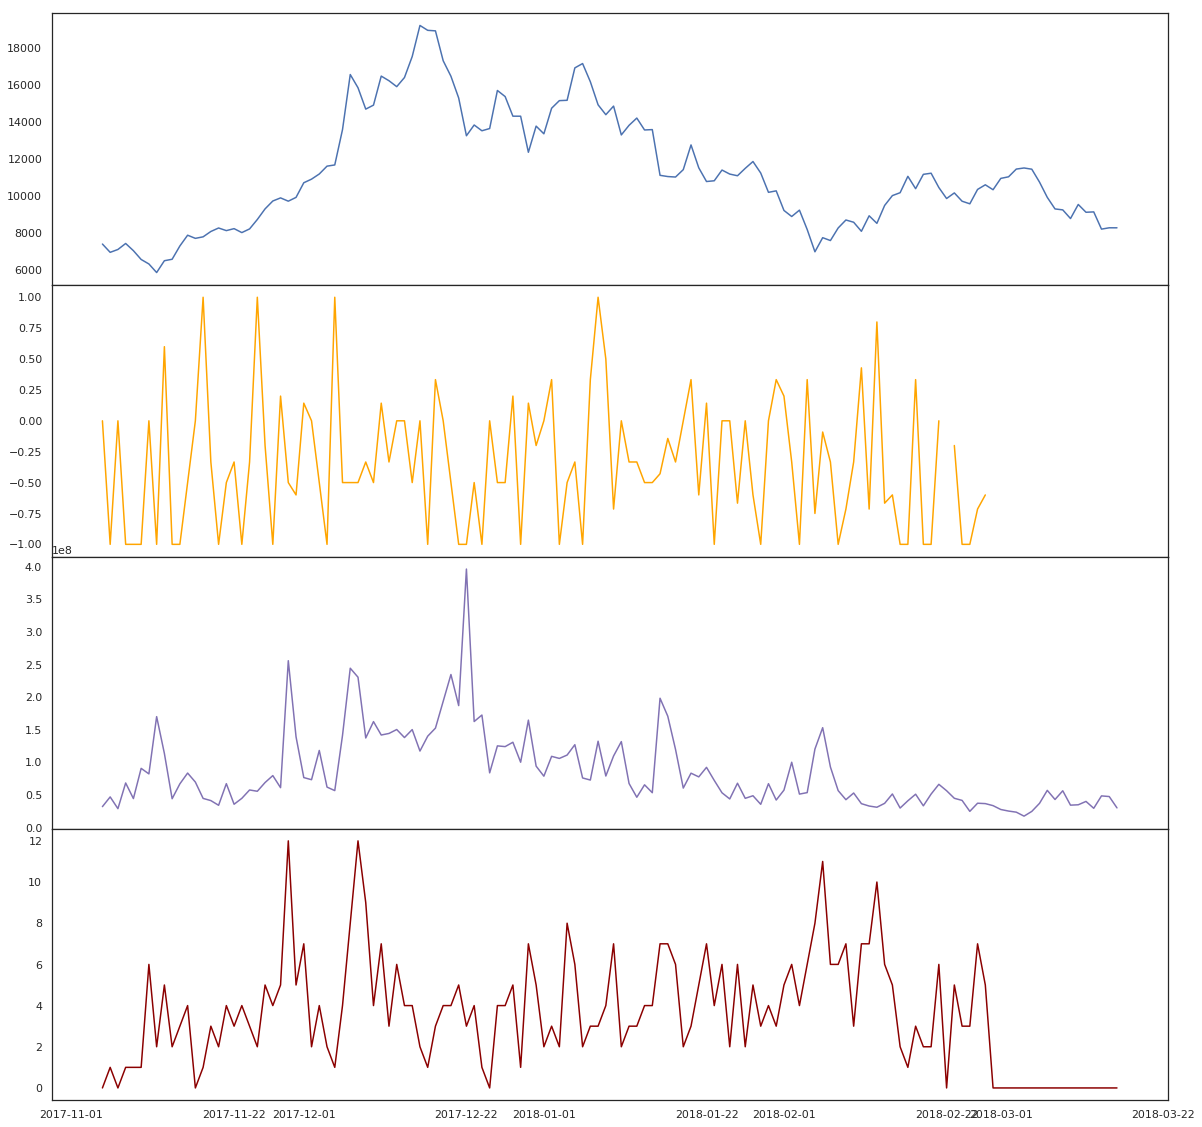

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
f1, ax = plt.subplots(4,1,sharex=True, figsize=(20, 20))
f1.subplots_adjust(hspace=0)


ax[0].plot(df_coin["timestamp"][:132],df_coin["close"][:132])
ax[1].plot(df_coin["timestamp"][:132],df_coin["positive"][:132]-df_coin["negative"][:132],color='orange')

ax[2].plot(df_coin["timestamp"][:132],df_coin["volumeto"][:132],color='m')
ax[3].plot(df_coin["timestamp"][:132],df_coin["samples"][:132],color='darkred')




plt.show()


**Plot a heatmap to identify the correlations**

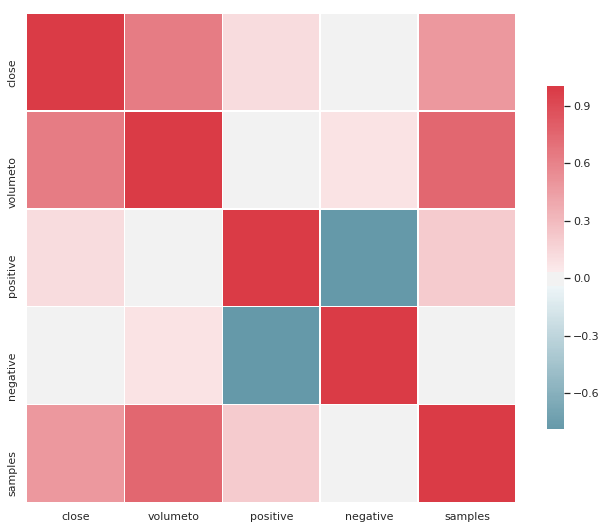

In [34]:
correlation = df_coin.corr()


sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))


cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax =sns.heatmap(correlation, cmap=cmap, vmax=1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .7})

plt.show()
